# Neurons & Layers

In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid 

## Neurons without an Activation Function (Linear Model/ Regression)

In [2]:
# Data Set

# X_train = (Size in 1000 Square Feet)
# Y_train = (Price in 1000s of Dollars)
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       

In [3]:
print(f"X_train:\n {X_train}")
print(f"Shape of the X_train: {X_train.shape}")
print("\n")
print(f"Y_train:\n {Y_train}")
print(f"Shape of the Y_train: {Y_train.shape}")

X_train:
 [[1.]
 [2.]]
Shape of the X_train: (2, 1)


Y_train:
 [[300.]
 [500.]]
Shape of the Y_train: (2, 1)


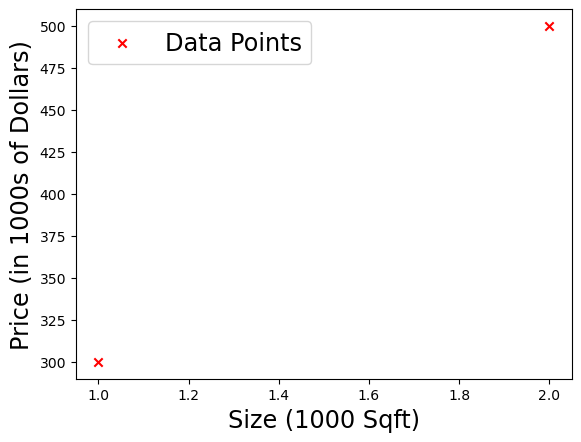

In [4]:
# Plot the Data Set

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax.legend(fontsize="xx-large")
ax.set_ylabel('Price (in 1000s of Dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 Sqft)', fontsize='xx-large')
plt.show()

The function that a neuron without an activation function executes is identical to that of linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

In [5]:
"""
The given code is a layer constructor from TensorFlow's Keras API for defining a dense (also known as fully connected) layer in a neural network. 

Let's break it down:

- `tf.keras.layers.Dense()`: This is a method used to create a dense layer, where each neuron receives input from all the neurons in the previous layer, hence the term "fully connected".

- `units=1`: The 'units' argument determines the number of neurons in the layer. Here, it is set to 1, meaning there is a single neuron in this layer.

- `activation='linear'`: The 'activation' argument specifies the activation function to be used. An activation function is used to introduce non-linearity into the neural network, allowing it to learn and perform more complex tasks. In this case, a linear activation function is used. A linear activation function will output the input directly without transforming it.

Overall, this line of code is defining a layer in a neural network where every neuron in the layer is connected to every neuron in the previous layer. This layer has a single neuron and uses a linear activation function. This type of layer could be used as the output layer in a network designed to solve a regression problem.
"""

linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear',)

In [6]:
# Examine the Weights
# (There are no weights as the weights are not yet instantiated.)

linear_layer.get_weights()

[]

In [7]:
# Let's try the model on one example in X_train. 
# This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.
# The result is a tensor (another name for an array) with a shape of (1,1) or one entry.

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.3215171]], shape=(1, 1), dtype=float32)


2023-05-30 14:58:54.181038: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 14:58:54.181406: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
# Now let's look at the weights and bias. 
# These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

# A linear regression model (1) with a single input feature will have a single weight and bias. 
# This matches the dimensions of our linear_layer above.

w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.3215171]], b=[0.]


In [9]:
# The weights are initialized to random values so let's set them to some known values.

set_w = np.array([[200]])
set_b = np.array([100])

# set_weights Takes a List of NumPy Arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [10]:
# Let's compare equation (1) to the layer output.
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [11]:
# They produce the same values! 
# Now, we can use our linear layer to make predictions on our training data.

prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

print(f"TensorFlow Prediction:\n {prediction_tf}")
print("\n")
print(f"NumPy Prediction:\n {prediction_np}")

TensorFlow Prediction:
 [[300.]
 [500.]]


NumPy Prediction:
 [[300.]
 [500.]]


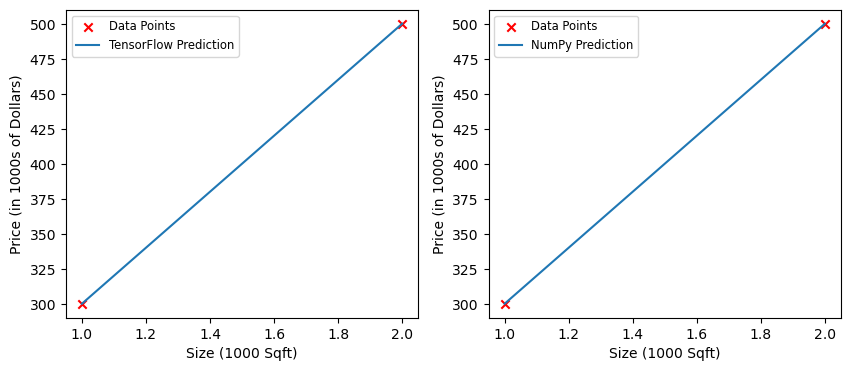

In [12]:
# Plot

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax[0].plot(X_train, prediction_tf, label = "TensorFlow Prediction")
ax[0].legend(fontsize="small")
ax[0].set_ylabel('Price (in 1000s of Dollars)')
ax[0].set_xlabel('Size (1000 Sqft)')

ax[1].scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax[1].plot(X_train, prediction_np, label = "NumPy Prediction")
ax[1].legend(fontsize="small")
ax[1].set_ylabel('Price (in 1000s of Dollars)')
ax[1].set_xlabel('Size (1000 Sqft)')
plt.show()

## Neurons with the Sigmoid Activation Function
The function that a neuron utilizing a sigmoid activation function executes is identical to that of logistic regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.

In [13]:
# Data Set

X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [14]:
print(f"X_train:\n {X_train}")
print(f"Shape of the X_train: {X_train.shape}")
print("\n")
print(f"Y_train:\n {Y_train}")
print(f"Shape of the Y_train: {Y_train.shape}")

X_train:
 [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Shape of the X_train: (6, 1)


Y_train:
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
Shape of the Y_train: (6, 1)


In [15]:
pos = Y_train == 1
neg = Y_train == 0
print(X_train[pos], X_train[neg])
print(Y_train[pos], Y_train[neg])

[3. 4. 5.] [0. 1. 2.]
[1. 1. 1.] [0. 0. 0.]


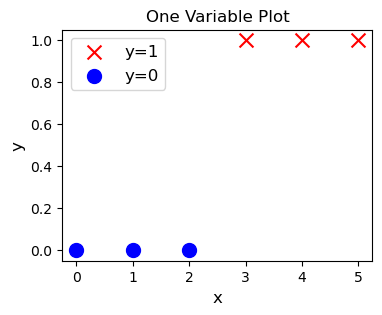

In [16]:
# Plot

pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=100, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, c="blue", label="y=0")
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('One Variable Plot')
ax.legend(fontsize=12)
plt.show()

#### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a TensorFlow Model that contains our logistic layer to demonstrate an alternate method of creating models. TensorFlow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [17]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.9975401]] [0.]
(1, 1) (1,)


In [20]:
# Let's set the weight and bias to some known values.
set_w = np.array([[2]])
set_b = np.array([-4.5])

# set_weights Takes a List of NumPy Arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [21]:
# Let's compare equation (2) to the layer output.
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

def sigmoidnp(z):
    """
    Compute the sigmoid of z.

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1 + np.exp(-z))
    return g
    g = 1.0/(1.0 + np.exp(-z))
    return g

alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(1,1)) + set_b)
print(alog)

[[0.01098694]]
[[0.01098694]]


They produce the same values! Now, we can use our logistic layer and NumPy model to make predictions on our training data.
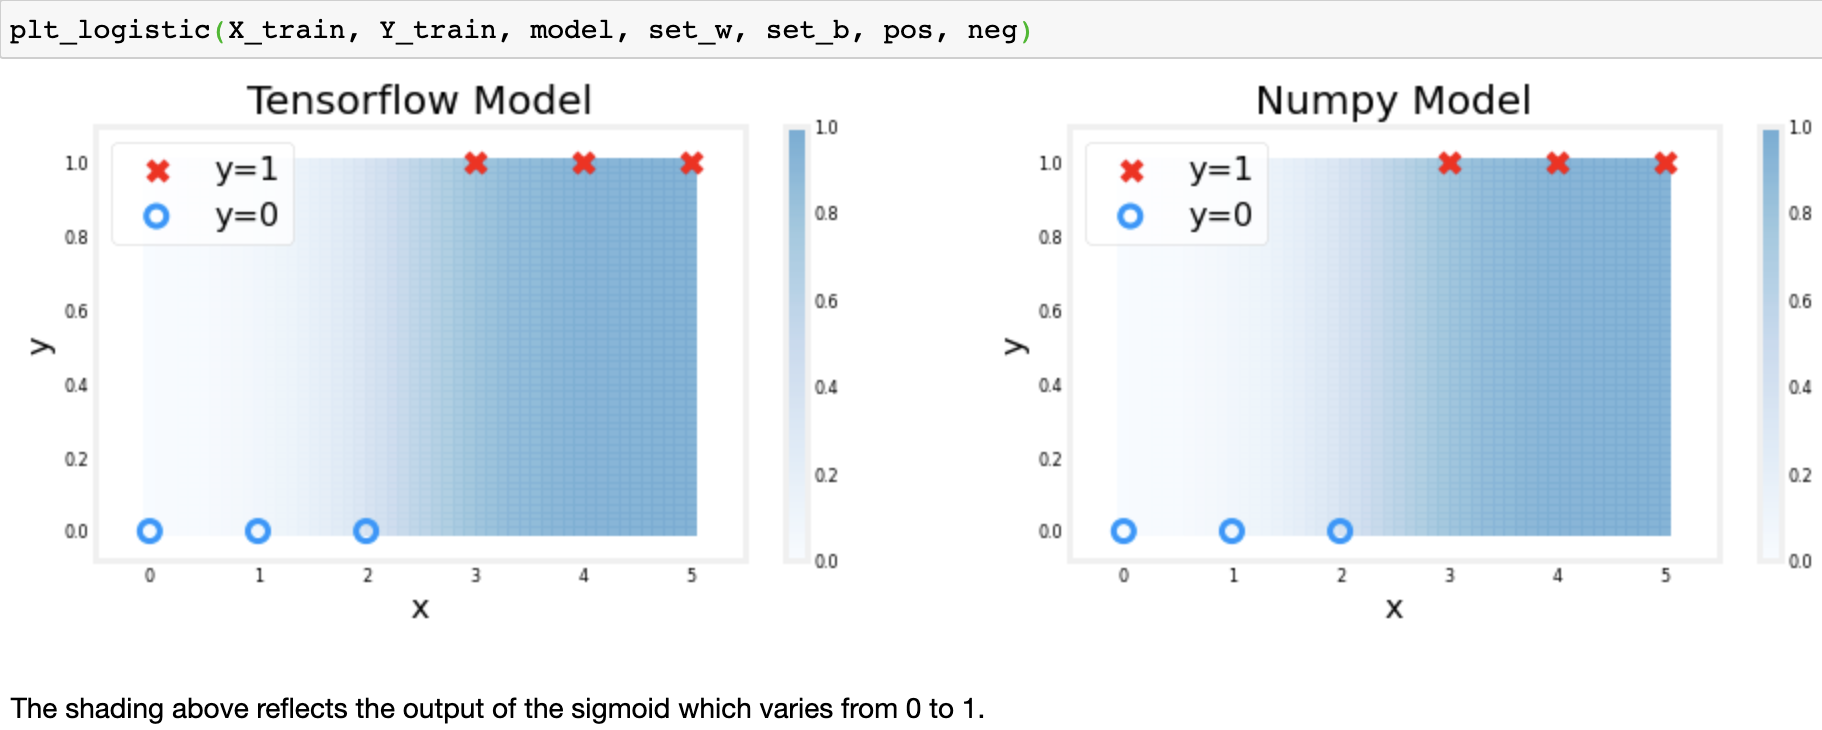